In [1]:
import pandas as pd # 데이터 구성 패키지( series, dataframe )
import numpy as np # 행렬 연산 패키지
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

sns.set(rc={'figure.figsize':(10, 5)})

# 컬럼 다 보이게
pd.set_option('display.max_columns',None)
# 행 다 보이게
pd.set_option('display.max_rows',None)

# 전처리
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing

# 한글 폰트
plt.rcParams["font.family"]='NanumGothicCoding'

# 음수 표시
plt.rcParams['axes.unicode_minus']=False

# 에러 무시
import warnings
warnings.filterwarnings(action='ignore')

# 날짜
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/total_data.csv의 사본", encoding='utf-8')

In [ ]:
df.head()

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,PD,SH,TD,MD담당자명,부서코드,부서명,협력사명,브랜드명,카테고리,목표달성여부,매출액,매출초과비율
0,1019149726356,60.0,56.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,1128578,1385098,184741,60000,26.0,2,109090,0,0,2,109090,88887,위탁매입,직택배,2,2020-02-11 12:40:00,2020-02-11T13:40,Tuesday,신이일,"박원이,최가영",송병호,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,2.836340e+06,7.875977
1,101989320130,65.0,101.4,생방송,건강식품,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,126466153,159598881,20080384,166000,24.5,969,136914208,39,5460325,930,131453883,108490818,위탁매입,협력사배송,1,2020-01-26 20:40:00,2020-01-26T21:45,Sunday,유이환,"박원이,이수완",이만혁,심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,3.220620e+09,82.365166
2,1019437320130,60.0,59.1,생방송,요목조목건강락서,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,58080269,73296654,8460912,166000,24.5,384,54618330,29,4156908,355,50461422,43279565,위탁매입,협력사배송,1,2020-04-27 07:15:00,2020-04-27T08:15,Monday,신이일,"송주선,임주원",윤주혁,심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,1.236305e+09,68.845465
3,1019474120130,60.0,81.6,생방송,건강식품,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,66825661,84333242,9376777,166000,24.5,583,82900208,32,4552270,551,78347938,65690125,위탁매입,협력사배송,1,2020-05-08 15:00:00,2020-05-08T16:00,Friday,유이환,"박원이,임주원",이인호,심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,1.919524e+09,92.902794
4,1019740120130,60.0,59.5,생방송,요목조목건강락서,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,56484473,71282778,7954798,176000,25.5,386,55833532,19,2781273,367,53052259,44242491,위탁매입,협력사배송,1,2020-07-20 07:15:00,2020-07-20T08:15,Monday,신이일,"송주선,임주원",최백장,심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,1.352833e+09,74.425072


In [ ]:
df.isnull().sum()

방송Code        0
소요분           0
가중분           0
방송구분          0
프로그램명         0
상품ID          0
상품명           0
매입과세구분        0
상품목표취급금액      0
상품목표주문금액      0
상품목표공헌이익금액    0
판매단가          0
수수료율          0
상품주문수량        0
상품주문금액        0
상품취소수량        0
상품취소금액        0
상품순주문수량       0
상품순주문금액       0
상품예상취급금액      0
매입형태          0
배송방식          0
상품방송순번        0
방송시작시간        0
방송종료시간        0
방송요일          0
PD            0
SH            0
TD            0
MD담당자명        0
부서코드          0
부서명           0
협력사명          0
브랜드명          0
카테고리          0
목표달성여부        0
매출액           0
매출초과비율        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545 entries, 0 to 16544
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방송Code      16545 non-null  int64  
 1   소요분         16545 non-null  float64
 2   가중분         16545 non-null  float64
 3   방송구분        16545 non-null  object 
 4   프로그램명       16545 non-null  object 
 5   상품ID        16545 non-null  int64  
 6   상품명         16545 non-null  object 
 7   매입과세구분      16545 non-null  object 
 8   상품목표취급금액    16545 non-null  int64  
 9   상품목표주문금액    16545 non-null  int64  
 10  상품목표공헌이익금액  16545 non-null  int64  
 11  판매단가        16545 non-null  int64  
 12  수수료율        16545 non-null  float64
 13  상품주문수량      16545 non-null  int64  
 14  상품주문금액      16545 non-null  int64  
 15  상품취소수량      16545 non-null  int64  
 16  상품취소금액      16545 non-null  int64  
 17  상품순주문수량     16545 non-null  int64  
 18  상품순주문금액     16545 non-null  int64  
 19  상품예상취급금액    16545 non-nul

In [ ]:
df=df.sort_values('방송시작시간', ascending=False) # 방송시작시간 - 최근 순으로 정렬

In [ ]:
# (기준일-최근방송시작시간), (방송Code.count), (매출액.sum)를 협력사별로 새로운 데이터 프레임 생성
df_temp=df.groupby('협력사명').agg({'방송Code':'count'
                                , '매출액':'sum'
                               , '방송시작시간':'max'}).reset_index()
df_temp.head()

,협력사명,방송Code,매출액,방송시작시간
0,(사)산업기업기술혁신협회,11,1.987568e+10,2020-06-12 07:15:00
1,(주) 에스제이트랜드,2,8.791094e+08,2021-10-25 06:40:00
2,(주) 에스턱생명공학,1,5.741424e+08,2021-09-27 15:40:00
3,(주) 온라익스턱어,1,7.190600e+09,2021-11-05 19:40:00
4,(주)각강에프턱,4,9.852097e+08,2020-11-17 17:50:00


In [ ]:
df_temp['기준일']=pd.to_datetime('2021-11-14') # 기준일 컬럼 생성
df_temp.head(3)

,협력사명,방송Code,매출액,방송시작시간,기준일
0,(사)산업기업기술혁신협회,11,1.987568e+10,2020-06-12 07:15:00,2021-11-14
1,(주) 에스제이트랜드,2,8.791094e+08,2021-10-25 06:40:00,2021-11-14
2,(주) 에스턱생명공학,1,5.741424e+08,2021-09-27 15:40:00,2021-11-14


In [ ]:
df_temp['마지막방송일']=df['방송시작시간']

df_temp.마지막방송일=df_temp.마지막방송일.astype('str')
df_temp['년월일']=pd.to_datetime(df_temp.마지막방송일.map(lambda x:x[:10]))

df_temp.head(3)

,협력사명,방송Code,매출액,방송시작시간,기준일,마지막방송일,년월일
0,(사)산업기업기술혁신협회,11,1.987568e+10,2020-06-12 07:15:00,2021-11-14,2020-02-11 12:40:00,2020-02-11
1,(주) 에스제이트랜드,2,8.791094e+08,2021-10-25 06:40:00,2021-11-14,2020-01-26 20:40:00,2020-01-26
2,(주) 에스턱생명공학,1,5.741424e+08,2021-09-27 15:40:00,2021-11-14,2020-04-27 07:15:00,2020-04-27


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   협력사명    644 non-null    object        
 1   방송Code  644 non-null    int64         
 2   매출액     644 non-null    float64       
 3   방송시작시간  644 non-null    object        
 4   기준일     644 non-null    datetime64[ns]
 5   마지막방송일  644 non-null    object        
 6   년월일     644 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
# Recency 컬럼 생성
df_temp['recency']=df_temp['기준일']-df_temp['년월일']
df_temp['recency']=df_temp.recency.astype('str')
df_temp.recency=df_temp.recency.str[:-5]
df_temp=df_temp.astype({'recency':'int'})

# Freqeuncy 컬럼 생성
df_temp['freqeuncy']=df_temp['방송Code']

# Monterary 컬럼 생성
df_temp['monterary']=df_temp['매출액']

df_temp.head(10)

,협력사명,방송Code,매출액,방송시작시간,기준일,마지막방송일,년월일,recency,freqeuncy,monterary
0,(사)산업기업기술혁신협회,11,1.987568e+10,2020-06-12 07:15:00,2021-11-14,2020-02-11 12:40:00,2020-02-11,642,11,1.987568e+10
1,(주) 에스제이트랜드,2,8.791094e+08,2021-10-25 06:40:00,2021-11-14,2020-01-26 20:40:00,2020-01-26,658,2,8.791094e+08
2,(주) 에스턱생명공학,1,5.741424e+08,2021-09-27 15:40:00,2021-11-14,2020-04-27 07:15:00,2020-04-27,566,1,5.741424e+08
3,(주) 온라익스턱어,1,7.190600e+09,2021-11-05 19:40:00,2021-11-14,2020-05-08 15:00:00,2020-05-08,555,1,7.190600e+09
4,(주)각강에프턱,4,9.852097e+08,2020-11-17 17:50:00,2021-11-14,2020-07-20 07:15:00,2020-07-20,482,4,9.852097e+08
5,(주)개뮤식품,16,2.853143e+10,2021-06-30 15:40:00,2021-11-14,2020-04-27 07:15:00,2020-04-27,566,16,2.853143e+10
6,(주)거림산업,21,4.930295e+10,2021-10-18 16:40:00,2021-11-14,2020-05-08 15:00:00,2020-05-08,555,21,4.930295e+10
7,(주)건영아이에프에스,1,1.049535e+09,2021-06-15 17:40:00,2021-11-14,2020-07-20 07:15:00,2020-07-20,482,1,1.049535e+09
8,(주)건화코포레이션,1,2.241786e+09,2020-07-24 19:20:00,2021-11-14,2020-05-05 06:15:00,2020-05-05,558,1,2.241786e+09
9,(주)광개토쇼핑,28,1.352303e+10,2021-10-08 07:35:00,2021-11-14,2020-05-21 06:45:00,2020-05-21,542,28,1.352303e+10


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   협력사명       644 non-null    object        
 1   방송Code     644 non-null    int64         
 2   매출액        644 non-null    float64       
 3   방송시작시간     644 non-null    object        
 4   기준일        644 non-null    datetime64[ns]
 5   마지막방송일     644 non-null    object        
 6   년월일        644 non-null    datetime64[ns]
 7   recency    644 non-null    int64         
 8   freqeuncy  644 non-null    int64         
 9   monterary  644 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 50.4+ KB


In [ ]:
df_temp.sample(5)

,협력사명,방송Code,매출액,방송시작시간,기준일,마지막방송일,년월일,recency,freqeuncy,monterary
240,(주)한옹름,115,1.668813e+11,2021-11-13 20:40:00,2021-11-14,2020-01-05 21:45:00,2020-01-05,679,115,1.668813e+11
250,(주)휴롬,8,2.503499e+10,2021-11-04 16:10:00,2021-11-14,2020-02-13 20:30:00,2020-02-13,640,8,2.503499e+10
282,더블유플러스주식회사,1,1.877229e+09,2020-01-07 14:40:00,2021-11-14,2020-03-07 08:15:00,2020-03-07,617,1,1.877229e+09
436,주식회사 리더스코스메틱,2,2.122580e+09,2020-09-13 23:45:00,2021-11-14,2020-04-17 17:15:00,2020-04-17,576,2,2.122580e+09
328,산업회사법익스다다채주식회사,3,1.375195e+09,2021-09-07 17:50:00,2021-11-14,2020-10-18 17:40:00,2020-10-18,392,3,1.375195e+09


In [ ]:
df_temp.describe()

,방송Code,매출액,recency,freqeuncy,monterary
count,644.000000,6.440000e+02,644.000000,644.000000,6.440000e+02
mean,25.690994,4.549999e+10,571.357143,25.690994,4.549999e+10
std,146.128916,2.556547e+11,131.054972,146.128916,2.556547e+11
min,1.000000,0.000000e+00,2.000000,1.000000,0.000000e+00
25%,2.000000,1.419186e+09,535.750000,2.000000,1.419186e+09
50%,4.000000,5.788231e+09,621.000000,4.000000,5.788231e+09
75%,14.250000,2.384745e+10,665.000000,14.250000,2.384745e+10
max,3238.000000,5.417944e+12,681.000000,3238.000000,5.417944e+12


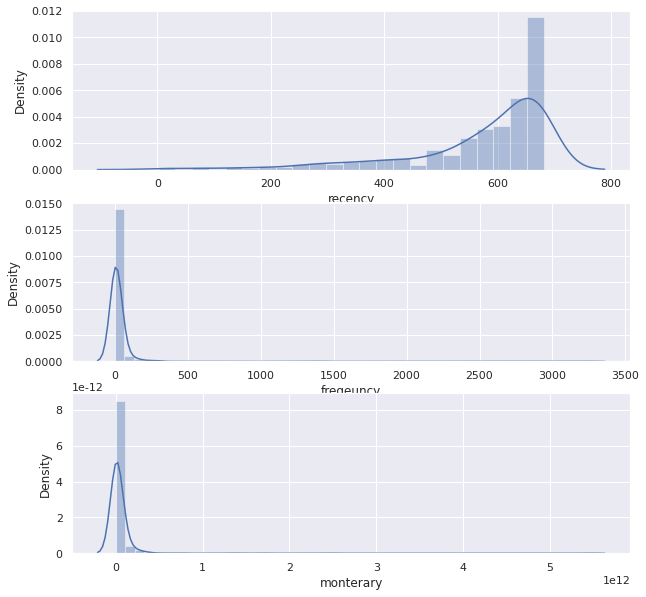

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 10))

sns.distplot(df_temp.recency, ax=ax[0])
sns.distplot(df_temp.freqeuncy, ax=ax[1])
sns.distplot(df_temp.monterary, ax=ax[2]);

### 최근성 / 빈도 / 매출액에 점수 부여  
\- 최근성 : 최근일수록 1,2,3,4,5  
\- 빈도 : 빈도가 높을수록 5,4,3,2,1  
\- 매출액 : 매출액이 높을수록 5,4,3,2,1  

In [ ]:
df_rfm=df_temp[['협력사명','recency','freqeuncy','monterary']]
df_rfm=df_rfm.rename(columns={'monterary':'monetary', 'freqeuncy':'frequency'})
df_rfm.head()

,협력사명,recency,frequency,monetary
0,(사)산업기업기술혁신협회,642,11,1.987568e+10
1,(주) 에스제이트랜드,658,2,8.791094e+08
2,(주) 에스턱생명공학,566,1,5.741424e+08
3,(주) 온라익스턱어,555,1,7.190600e+09
4,(주)각강에프턱,482,4,9.852097e+08


In [ ]:

# temp=df_rfm[['recency','frequency','monetary']]
# temp=StandardScaler().fit(temp)

In [ ]:
# temp_df=pd.DataFrame(temp, columns=['recency_scaled','frequency_scaled','monetary_scaled'])

In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   협력사명       644 non-null    object 
 1   recency    644 non-null    int64  
 2   frequency  644 non-null    int64  
 3   monetary   644 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 20.2+ KB


In [ ]:
df_rfm.describe()

,recency,frequency,monetary
count,644.000000,644.000000,6.440000e+02
mean,571.357143,25.690994,4.549999e+10
std,131.054972,146.128916,2.556547e+11
min,2.000000,1.000000,0.000000e+00
25%,535.750000,2.000000,1.419186e+09
50%,621.000000,4.000000,5.788231e+09
75%,665.000000,14.250000,2.384745e+10
max,681.000000,3238.000000,5.417944e+12


In [ ]:
# 5개의 군집으로 군집화한 경우 - kmeans 사용

kmeans = KMeans(n_clusters=5)

kmeans.fit(df_rfm[['recency']])
df_rfm['recencycluster']=kmeans.predict(df_rfm[['recency']])

kmeans.fit(df_rfm[['frequency']])
df_rfm['frequencycluster']=kmeans.predict(df_rfm[['frequency']])

kmeans.fit(df_rfm[['monetary']])
df_rfm['monetarycluster']=kmeans.predict(df_rfm[['monetary']])

df_rfm.head()

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
0,(사)산업기업기술혁신협회,642,11,1.987568e+10,0,0,0
1,(주) 에스제이트랜드,658,2,8.791094e+08,0,0,0
2,(주) 에스턱생명공학,566,1,5.741424e+08,4,0,0
3,(주) 온라익스턱어,555,1,7.190600e+09,4,0,0
4,(주)각강에프턱,482,4,9.852097e+08,1,0,0


In [ ]:
df_rfm['recencycluster'].value_counts()

0    338
4    168
1     70
3     49
2     19
Name: recencycluster, dtype: int64

In [ ]:
df_rfm['recencycluster'].value_counts()

0    338
4    168
1     70
3     49
2     19
Name: recencycluster, dtype: int64

In [ ]:
df_rfm['monetarycluster'].value_counts()

0    599
3     41
2      2
1      1
4      1
Name: monetarycluster, dtype: int64

In [ ]:
df_rfm.describe()

,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
count,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000
mean,571.357143,25.690994,4.549999e+10,1.439441,0.163043,0.204969
std,131.054972,146.128916,2.556547e+11,1.737268,0.678348,0.755430
min,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,535.750000,2.000000,1.419186e+09,0.000000,0.000000,0.000000
50%,621.000000,4.000000,5.788231e+09,0.000000,0.000000,0.000000
75%,665.000000,14.250000,2.384745e+10,4.000000,0.000000,0.000000
max,681.000000,3238.000000,5.417944e+12,4.000000,4.000000,4.000000


In [ ]:
df_rfm[df_rfm['monetary']>=23847446468.9].sort_values('monetary')

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
221,(주)파익스씨티,661,15,2.472769e+10,0,0,0
250,(주)휴롬,640,8,2.503499e+10,0,0,0
181,(주)지나송,576,40,2.517553e+10,4,0,0
423,주식회사 뉴트리원,641,23,2.524869e+10,0,0,0
166,(주)정선물산,669,9,2.563084e+10,0,0,0
194,(주)카이리진,673,12,2.571653e+10,0,0,0
119,(주)에이트플러스,532,6,2.596570e+10,4,0,0
580,주식회사카이리캔,235,15,2.633056e+10,3,0,0
248,(주)홈즈코리아,623,22,2.679251e+10,0,0,0
553,주식회사에쎄르,676,10,2.686963e+10,0,0,0


In [ ]:
df_rfm[df_rfm['monetarycluster']==1]

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
80,(주)산업기업유통센터,656,3238,5.417944e+12,0,1,1


In [ ]:
df_rfm.loc[df_rfm['monetary']>=1339002899635.7, 'monetary']=23847446468.9
df_rfm[df_rfm['monetarycluster']==1]

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
80,(주)산업기업유통센터,656,3238,2.384745e+10,0,1,1


In [ ]:
df_rfm[df_rfm['monetarycluster']==2]

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
223,(주)패옹킴,679,284,2.384745e+10,0,3,2
299,물산업협동조합중앙회,391,723,2.384745e+10,1,2,2


In [ ]:
df_rfm[df_rfm['monetarycluster']==4]

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
339,산협경제지주㈜,578,1374,2.384745e+10,4,4,4


In [ ]:
df_rfm.describe()

,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
count,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000
mean,571.357143,25.690994,2.875135e+10,1.439441,0.163043,0.204969
std,131.054972,146.128916,6.691056e+10,1.737268,0.678348,0.755430
min,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,535.750000,2.000000,1.419186e+09,0.000000,0.000000,0.000000
50%,621.000000,4.000000,5.788231e+09,0.000000,0.000000,0.000000
75%,665.000000,14.250000,2.362739e+10,4.000000,0.000000,0.000000
max,681.000000,3238.000000,7.380433e+11,4.000000,4.000000,4.000000


In [ ]:
#df_rfm['frequency'][df_rfm['frequency']>100]=20

In [ ]:
#df_rfm=df_rfm[df_rfm['frequency']<1500].reset_index()
df_rfm.describe()

,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster
count,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000
mean,571.357143,25.690994,2.875135e+10,1.439441,0.163043,0.204969
std,131.054972,146.128916,6.691056e+10,1.737268,0.678348,0.755430
min,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,535.750000,2.000000,1.419186e+09,0.000000,0.000000,0.000000
50%,621.000000,4.000000,5.788231e+09,0.000000,0.000000,0.000000
75%,665.000000,14.250000,2.362739e+10,4.000000,0.000000,0.000000
max,681.000000,3238.000000,7.380433e+11,4.000000,4.000000,4.000000


In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   협력사명              644 non-null    object 
 1   recency           644 non-null    int64  
 2   frequency         644 non-null    int64  
 3   monetary          644 non-null    float64
 4   recencycluster    644 non-null    int32  
 5   frequencycluster  644 non-null    int32  
 6   monetarycluster   644 non-null    int32  
dtypes: float64(1), int32(3), int64(2), object(1)
memory usage: 27.8+ KB


### 직접 분위수 구하기

In [ ]:
## 각 항목별 점수 구하기

# rececy=df_rfm.rececy
# frequency=df_rfm.frequency
# monetary=df_rfm.monetary

recency_lv=[]
frequency_lv=[]
monetary_lv=[]
for x in np.linspace(0,1,6)[1:-1]:
    recency_lv.append(int(np.quantile(df_rfm.recency,x)))
    print(f'recency 분위수 : {np.quantile(df_rfm.recency,x):.0f}')
print(recency_lv)

for x in np.linspace(0,1,6)[1:-1]:
    frequency_lv.append(int(np.quantile(df_rfm.frequency,x)))
    print(f'frequency 분위수 : {np.quantile(df_rfm.frequency,x):.0f}')
print(frequency_lv)

for x in np.linspace(0,1,6)[1:-1]:
    monetary_lv.append(int(np.quantile(df_rfm.monetary,x)))
    print(f'monetary 분위수 : {np.quantile(df_rfm.monetary,x):.0f}')
print(monetary_lv)

recency 분위수 : 494
recency 분위수 : 590
recency 분위수 : 640
recency 분위수 : 672
[493, 590, 639, 672]
frequency 분위수 : 2
frequency 분위수 : 3
frequency 분위수 : 6
frequency 분위수 : 19
[2, 3, 6, 19]
monetary 분위수 : 1053701374
monetary 분위수 : 3357981491
monetary 분위수 : 10523277819
monetary 분위수 : 33810403604
[1053701373, 3357981490, 10523277819, 33810403603]


#### rfm을 분위수에 따라 점수 부여
![스크린샷 2023-03-14 15.23.35.png](attachment:629ec1e4-71f3-4d50-88ad-7f39f60029e0.png)

In [ ]:
# 점수 계산 함수
def get_score(lv, data):
    score = [] 
    for j in range(len(data)): 
        for i in range(len(lv)): 
            if data[j] <= lv[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(lv): 
                score.append(len(lv)+1) 
                break 
            else: 
                continue 
    return score

In [ ]:
# rfm 각 항목별로 점수 계산
df_rfm['recency_score']=get_score(recency_lv, df_rfm.recency)
df_rfm['frequency_score']=get_score(frequency_lv, df_rfm.frequency)
df_rfm['monetary_score']=get_score(monetary_lv, df_rfm.monetary)
df_rfm.head()

In [ ]:
df_rfm['recency_score'].value_counts()

4    130
2    130
1    129
5    128
3    127
Name: recency_score, dtype: int64

In [ ]:
df_rfm['frequency_score'].value_counts()

1    228
4    131
5    125
3    106
2     54
Name: frequency_score, dtype: int64

In [ ]:
df_rfm['monetary_score'].value_counts()

4    129
1    129
5    129
2    129
3    128
Name: monetary_score, dtype: int64

In [ ]:
df_rfm['score_w']=df_rfm.recency_score*0.2 + df_rfm.frequency_score*0.3 + df_rfm.monetary_score*0.5
df_rfm.head(10)

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster,recency_score,frequency_score,monetary_score,score_w
0,(사)산업기업기술혁신협회,642,11,1.987568e+10,0,0,0,4,4,4,4.0
1,(주) 에스제이트랜드,658,2,8.791094e+08,0,0,0,4,1,1,1.6
2,(주) 에스턱생명공학,566,1,5.741424e+08,4,0,0,2,1,1,1.2
3,(주) 온라익스턱어,555,1,7.190600e+09,4,0,0,2,1,3,2.2
4,(주)각강에프턱,482,4,9.852097e+08,1,0,0,1,3,1,1.6
5,(주)개뮤식품,566,16,2.853143e+10,4,0,0,2,4,4,3.6
6,(주)거림산업,555,21,4.930295e+10,4,0,0,2,5,5,4.4
7,(주)건영아이에프에스,482,1,1.049535e+09,1,0,0,1,1,1,1.0
8,(주)건화코포레이션,558,1,2.241786e+09,4,0,0,2,1,2,1.7
9,(주)광개토쇼핑,542,28,1.352303e+10,4,0,0,2,5,4,3.9


In [ ]:
df_rfm["recency_score2"] = pd.qcut(df_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
df_rfm["frequency_score2"] = pd.qcut(df_rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_rfm["monetary_score2"] = pd.qcut(df_rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
df_rfm['rfm_score'] = df_rfm['recency_score2'].astype(int)*0.3 + df_rfm['frequency_score2'].astype(int)*0.3 + df_rfm['monetary_score2'].astype(int)*0.4
df_rfm.head(3)

In [ ]:
df_rfm.describe()

,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster,recency_score,frequency_score,monetary_score,score_w,rfm_score
count,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,571.357143,25.690994,2.875135e+10,1.439441,0.163043,0.204969,2.996894,2.799689,3.000000,2.939286,3.000932
std,131.054972,146.128916,6.691056e+10,1.737268,0.678348,0.755430,1.415309,1.563165,1.416411,1.177720,1.046076
min,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,535.750000,2.000000,1.419186e+09,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.800000,2.100000
50%,621.000000,4.000000,5.788231e+09,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.900000,3.000000
75%,665.000000,14.250000,2.362739e+10,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.025000,3.800000
max,681.000000,3238.000000,7.380433e+11,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# rfm 등급 분류 
def rfm_level(score):
    if score >= 4.5:
        return 'Diamond'
    elif score >= 3.8:
        return 'Platinum'
    elif score >= 3:
        return 'Gold'
    elif score >= 2:
        return 'Silver'
    else:
        return 'Bronze'
    
df_rfm['segment'] = df_rfm['rfm_score'].map(lambda x: rfm_level(x))
df_rfm.head()

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster,recency_score,frequency_score,monetary_score,score_w,recency_score2,frequency_score2,monetary_score2,rfm_score,segment
0,(사)산업기업기술혁신협회,642,11,1.987568e+10,0,0,0,4,4,4,4.0,2,4,4,3.4,Gold
1,(주) 에스제이트랜드,658,2,8.791094e+08,0,0,0,4,1,1,1.6,2,1,1,1.3,Bronze
2,(주) 에스턱생명공학,566,1,5.741424e+08,4,0,0,2,1,1,1.2,4,1,1,1.9,Bronze
3,(주) 온라익스턱어,555,1,7.190600e+09,4,0,0,2,1,3,2.2,4,1,3,2.7,Silver
4,(주)각강에프턱,482,4,9.852097e+08,1,0,0,1,3,1,1.6,5,3,1,2.8,Silver


In [ ]:
df_rfm.sort_values('rfm_score')

,협력사명,recency,frequency,monetary,recencycluster,frequencycluster,monetarycluster,recency_score,frequency_score,monetary_score,score_w,recency_score2,frequency_score2,monetary_score2,rfm_score,segment
412,죠르노벤띠,678,1,2.706904e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
106,(주)아이온,680,1,9.990492e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
396,유빈펄프,678,1,1.818028e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
317,산업회사법익스 주식회사 턱자익스산부,678,1,1.879826e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
308,빛고을김치,678,1,3.714217e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
331,산업회사법익스주식회사건산,678,1,4.208284e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
224,(주)패이처셀,679,1,2.077773e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
639,형담물산협동조합,676,1,2.928344e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
635,향아물산영어조합법익스,676,1,5.750628e+08,0,0,0,5,1,1,1.8,1,1,1,1.0,Bronze
263,고맛나루공주시산협쌀조합공동사업법익스,663,1,5.965723e+08,0,0,0,4,1,1,1.6,2,1,1,1.3,Bronze


In [ ]:
df_rfm['segment'].value_counts()

Silver      176
Gold        174
Bronze      124
Platinum    117
Diamond      53
Name: segment, dtype: int64

In [ ]:
df_temp=df_rfm.groupby('segment').agg({'monetary':'sum'})
df_temp

,monetary
segment,
Bronze,9.983586e+10
Diamond,6.413382e+12
Gold,2.299021e+12
Platinum,9.187423e+12
Silver,5.162056e+11


In [ ]:
a = (df_temp['monetary'] / sum(df_temp['monetary'])) * 100
a

segment
Bronze       0.539191
Diamond     34.637222
Gold        12.416491
Platinum    49.619188
Silver       2.787909
Name: monetary, dtype: float64

## 시각화

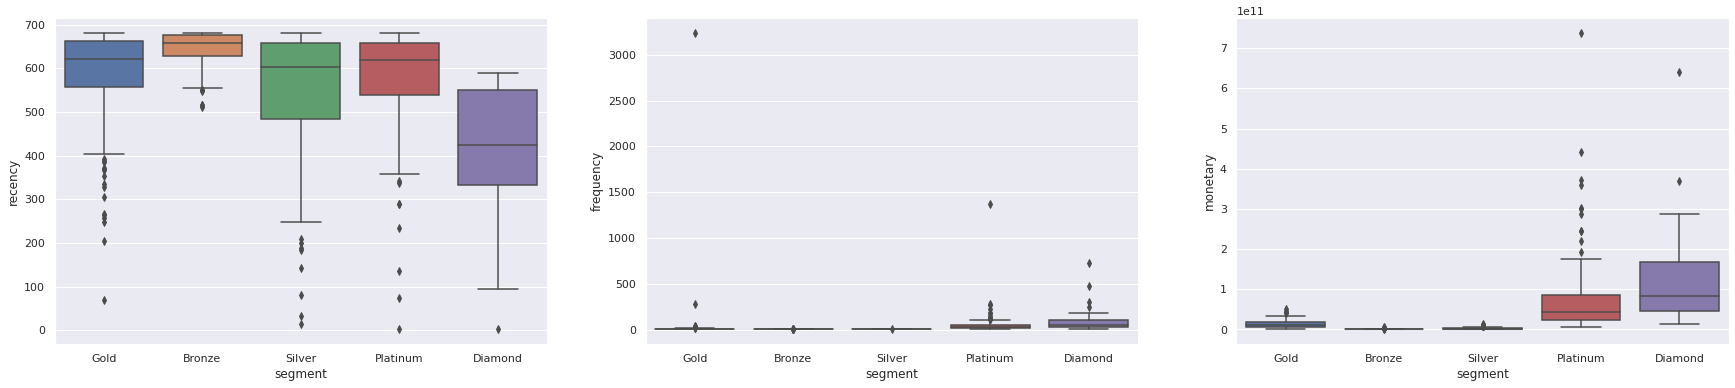

In [ ]:
plt.figure(figsize=(30, 6))
plt.subplot(1,3,1)
sns.boxplot(data=df_rfm, x='segment', y='recency')
plt.subplot(1,3,2)
sns.boxplot(data=df_rfm, x='segment', y='frequency')
plt.subplot(1,3,3)
sns.boxplot(data=df_rfm, x='segment', y='monetary');

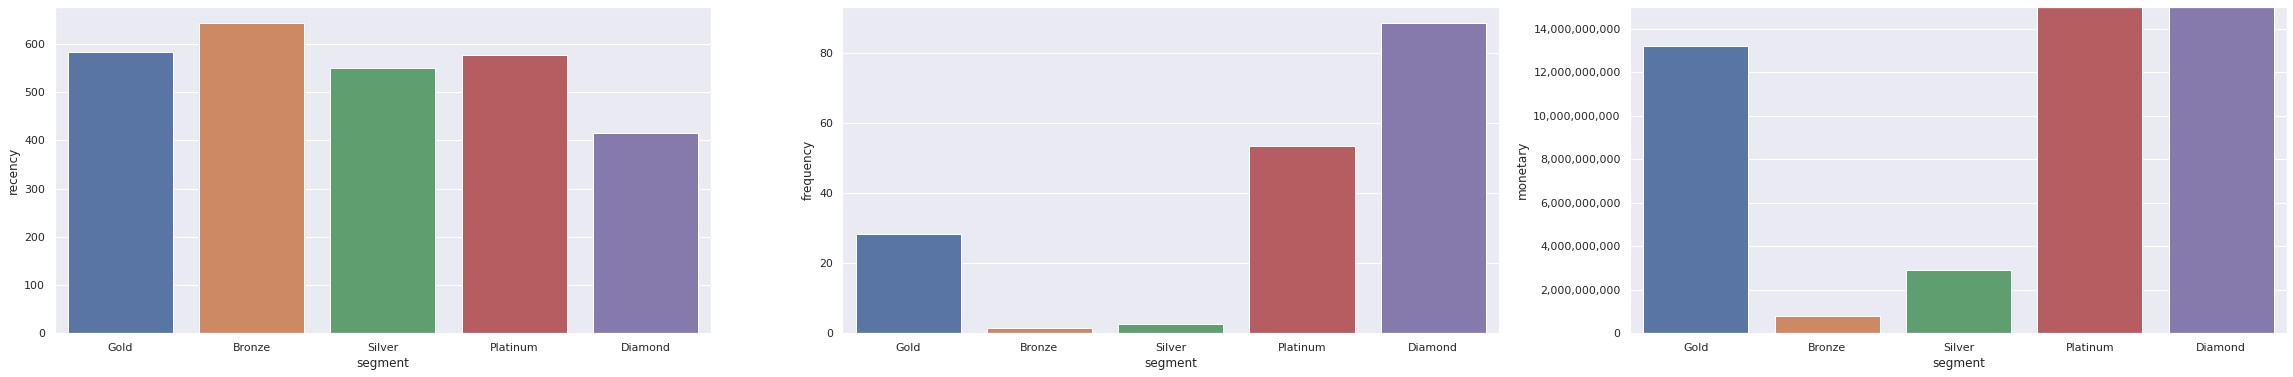

In [ ]:
plt.figure(figsize=(40,6))
plt.subplot(1,3,1)
sns.barplot(data=df_rfm, x='segment', y='recency', ci=None)
plt.subplot(1,3,2)
sns.barplot(data=df_rfm, x='segment', y='frequency', ci=None)
plt.subplot(1,3,3)
plt.ylim([0,15000000000])
sns.barplot(data=df_rfm, x='segment', y='monetary', ci=None)

# 지수 표현 없애고, 1000단위에 ,찍기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show();

In [ ]:
df_rfm.pivot_table(index='segment',values='monetary',aggfunc='sum').reset_index()

,segment,monetary
0,Bronze,9.983586e+10
1,Diamond,6.413382e+12
2,Gold,2.299021e+12
3,Platinum,9.187423e+12
4,Silver,5.162056e+11


In [ ]:
df_rfm.pivot_table(index='segment',values=['monetary','frequency','recency'],aggfunc='mean').reset_index()

,segment,frequency,monetary,recency
0,Bronze,1.572581,8.051279e+08,644.145161
1,Diamond,88.792453,1.210072e+11,415.377358
2,Gold,28.448276,1.321276e+10,583.643678
3,Platinum,53.410256,7.852498e+10,577.829060
4,Silver,2.528409,2.932986e+09,550.596591


In [ ]:

df[df['협력사명']=='(사)산업기업기술혁신협회']

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,PD,SH,TD,MD담당자명,부서코드,부서명,협력사명,브랜드명,카테고리,목표달성여부,매출액,매출초과비율
5939,1015604237892,60.0,56.6,생방송,F_잡화,10499520,닫음[디오베] 18K 노블레스 볼륨 컬렉션9종(18K 2종+ 쥬얼리7종),과세,65918590,140252319,8931807,299000,25.0,531,142688995,38,10123313,493,132565682,67063828,위탁매입,협력사배송,1,2020-06-12 07:15:00,2020-06-12T08:15,Friday,강주우,"최소유,박보경",이만혁,최주나,3111305,생활3팀,(사)산업기업기술혁신협회,디오베노블레스18k,잡화,0,3.314142e+09,94.519423
5836,1003594638034,60.0,59.1,생방송,F_생활용품,10497346,[내가족치아건강지킴이]프리쉐더블케어칫솔살균기1+1세트,과세,66916957,84705008,9446876,89000,25.5,638,50514269,32,2513789,606,48000480,39906273,위탁매입,협력사배송,1,2020-06-10 18:40:00,2020-06-10T19:40,Wednesday,최조환,"이서경,권기문",최백장,"이서소,최의",3111105,생활1팀,(사)산업기업기술혁신협회,프리쉐더블케어칫솔살균기,생활용품,0,1.224012e+09,56.667818
5838,1003594838034,60.0,59.1,생방송,F_생활용품,10520612,[단품]프리쉐휴대용칫솔살균기,과세,1153741,1357342,162877,19900,25.5,1,18091,1,18091,0,0,15377,위탁매입,협력사배송,3,2020-06-10 18:40:00,2020-06-10T19:40,Wednesday,최조환,"이서경,권기문",최백장,"이서소,최의",3111105,생활1팀,(사)산업기업기술혁신협회,프리쉐더블케어칫솔살균기,생활용품,0,0.000000e+00,0.000000
5837,1003594738034,60.0,59.1,생방송,F_생활용품,10520586,[내가족치아건강지킴이]프리쉐더블케어칫솔살균기1세트,과세,1153741,1460431,162877,59000,25.5,168,8807770,10,518408,158,8289362,6958138,위탁매입,협력사배송,2,2020-06-10 18:40:00,2020-06-10T19:40,Wednesday,최조환,"이서경,권기문",최백장,"이서소,최의",3111105,생활1팀,(사)산업기업기술혁신협회,프리쉐더블케어칫솔살균기,생활용품,1,2.113787e+08,567.596963
3582,1015287336980,60.0,76.0,생방송,잡화,10446202,[디오베] 18K 프리미엄 컬렉션11종(18K 1종+ 쥬얼리10종)_3,과세,90975591,193565088,16416681,199000,25.0,743,133001936,37,6600275,706,126401661,62510910,위탁매입,협력사배송,1,2020-03-17 09:25:00,2020-03-17T10:25,Tuesday,이혁애,"최육영,박보경",송창장,최주나,3111305,생활3팀,(사)산업기업기술혁신협회,디오베프리미엄18k,잡화,0,3.160042e+09,65.301890
2857,1015254736980,60.1,59.1,생방송,잡화,10417596,[디오베] 18K 프리미엄 쥬얼리+게르마늄 컬렉션(총11종)_3,과세,58921493,117842986,10632471,259000,25.0,325,75668413,17,3935098,308,71733315,37834207,위탁매입,협력사배송,1,2020-03-08 07:15:00,2020-03-08T08:15,Sunday,이리아,"최육영,박승희",이만혁,최주나,3111305,생활3팀,(사)산업기업기술혁신협회,디오베프리미엄18k,잡화,0,1.793333e+09,60.871943
2859,1015254836980,60.1,59.1,생방송,잡화,10420766,[단품] 디오베 게르마늄 팔찌 + 목걸이 세트_3,과세,11784299,24049589,2126494,149000,25.0,68,9137366,4,539090,64,8598276,4477309,위탁매입,협력사배송,2,2020-03-08 07:15:00,2020-03-08T08:15,Sunday,이리아,"최육영,박승희",이만혁,최주나,3111305,생활3팀,(사)산업기업기술혁신협회,디오베프리미엄18k,잡화,0,2.149569e+08,35.752278
2947,1002165636738,65.0,111.6,생방송,레포츠기기,10425118,[델첸]프라임안마의자_1,과세,134820311,189887763,22526140,1090000,26.0,121,118924275,10,9750455,111,109173820,84436235,위탁매입,협력사배송,1,2020-02-15 22:40:00,2020-02-15T23:45,Saturday,강인택,"박장혜,이장혁",이인호,"최백원,강동완",3111405,생활4팀,(사)산업기업기술혁신협회,델첸안마의자프라임,레포츠기기,0,2.838519e+09,57.493868
2856,1015152436980,60.0,63.2,생방송,F_잡화,10417596,[디오베] 18K 프리미엄 쥬얼리+게르마늄 컬렉션(총11종)_3,과세,69610836,139221672,12514454,259000,25.0,688,160419341,65,15097596,623,145321745,80209671,위탁매입,협력사배송,1,2020-02-11 07:15:00,2020-02-11T08:15,Tuesday,이혁애,"최육영,박보경",이만혁,최주나,3111305,생활3팀,(사)산업기업기술혁신협회,디오베프리미엄18k,잡화,1,3.633044e+09,104.381554
2858,1015152536980,60.0,63.2,생방송,F_잡화,10420766,[단품] 디오베 게르마늄 팔찌 + 목걸이 세트_3,과세,6328258,12914812,1137678,149000,25.0,166,22267664,32,4306414,134,17961250,10911155,위탁매입,협력사배송,2,2020-02-11 07:15:00,2020-02-11T08:15,Tuesday,이혁애,"최육영,박보경",이만혁,최주나,3111305,생활3팀,(사)산업기업기술혁신협회,디오베프리미엄18k,잡화,1,4.490312e+08,139.074808
